In [15]:
import pandas as pd

In [16]:
df = pd.read_csv("Bombay_house_price.csv")
df.head(5)

,Price,PricePerSqft,Area_Sqm,Location,Bedrooms,Latitude,Longitude,PricePerSqM
0,13300000,16625,74.32,Kandivali (East),2,19.210200,72.864891,178885.00
1,9000000,15666,55.74,Ramgad Nagar,1,19.167700,72.949300,168566.16
2,9000000,19148,43.66,Mahakali Caves,1,19.130609,72.873816,206032.48
3,9000000,10588,78.97,Louis Wadi,2,19.126005,72.825052,113926.88
4,100000000,20000,464.51,Barrister Nath Pai Nagar,5,19.075014,72.907571,215200.00


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 8 columns):
Price           840 non-null int64
PricePerSqft    840 non-null int64
Area_Sqm        840 non-null float64
Location        840 non-null object
Bedrooms        840 non-null int64
Latitude        722 non-null float64
Longitude       722 non-null float64
PricePerSqM     840 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 52.6+ KB


In [18]:
df['Latitude'] = df['Latitude'].fillna(19.0760)
df['Longitude'] = df['Longitude'].fillna(72.8777)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 8 columns):
Price           840 non-null int64
PricePerSqft    840 non-null int64
Area_Sqm        840 non-null float64
Location        840 non-null object
Bedrooms        840 non-null int64
Latitude        840 non-null float64
Longitude       840 non-null float64
PricePerSqM     840 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 52.6+ KB


In [20]:
df = df.drop(columns=['Location','PricePerSqft'])

In [21]:
df.describe()

,Price,Area_Sqm,Bedrooms,Latitude,Longitude,PricePerSqM
count,8.400000e+02,840.000000,840.000000,840.000000,840.000000,8.400000e+02
mean,9.333358e+06,67.745512,1.488095,19.195025,73.079281,1.085698e+05
std,2.874726e+07,79.604113,1.315481,1.087931,2.557308,1.668503e+05
min,1.150000e+05,10.220000,1.000000,12.908981,4.619055,4.637560e+03
25%,2.200000e+06,41.810000,1.000000,19.076000,72.854177,4.553901e+04
50%,4.000000e+06,52.950000,1.000000,19.177194,72.938476,7.172616e+04
75%,7.500000e+06,69.680000,2.000000,19.247059,73.106873,1.233177e+05
max,4.601000e+08,1714.060000,31.000000,36.600121,85.309692,3.972915e+06


In [22]:
print("Skewness: %f" % df['Price'].skew())
print("Kurtosis: %f" % df['Price'].kurt())

Skewness: 10.365970
Kurtosis: 129.004814


In [23]:
import matplotlib.pyplot  as plt

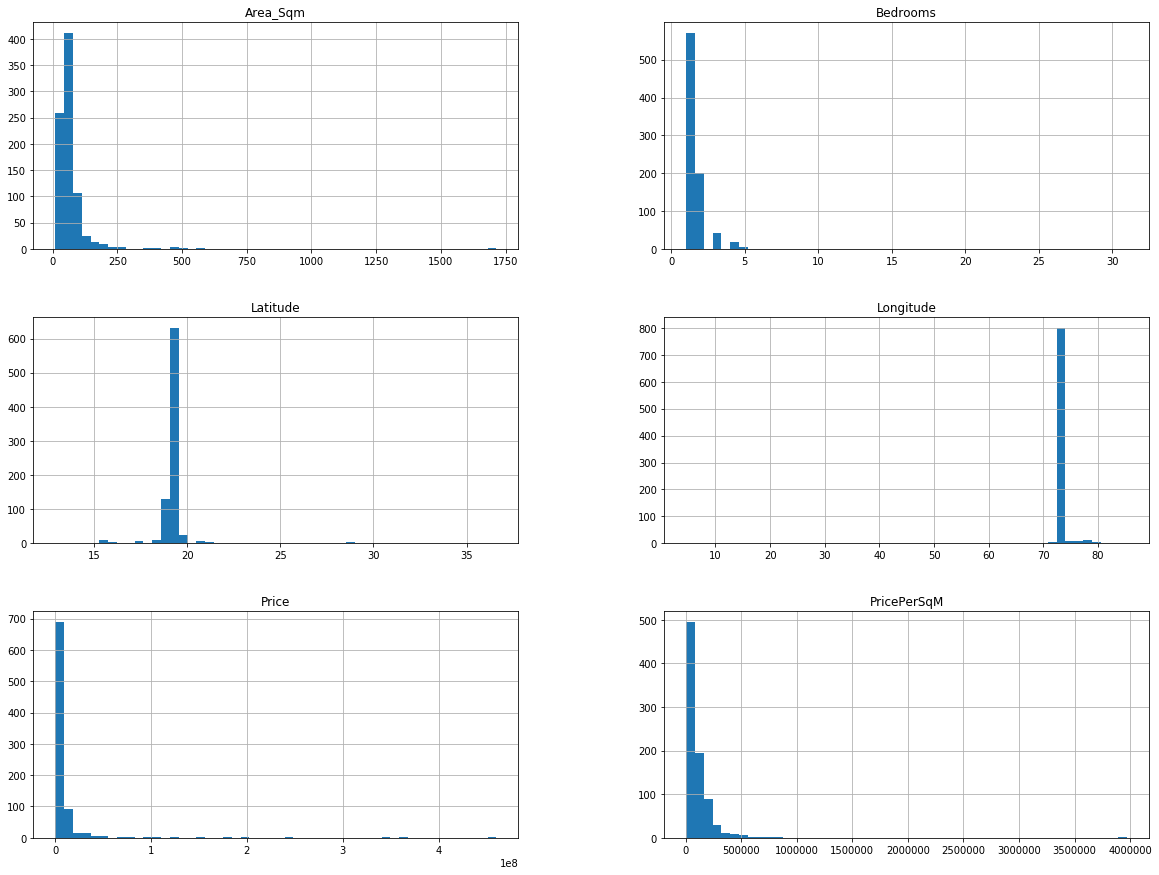

In [24]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [25]:
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats

# Price without any Transformation

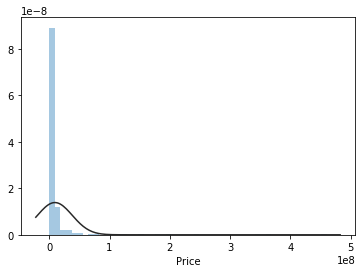

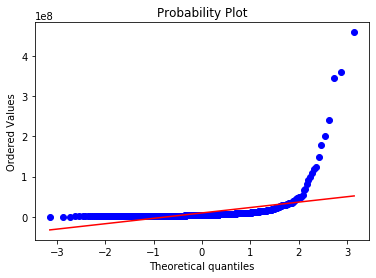

In [26]:
#histogram and normal probability plot
sns.distplot(df['Price'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df['Price'], plot=plt)

# After Log Transformation

In [27]:
df['PriceLog'] = np.log(df['Price'])

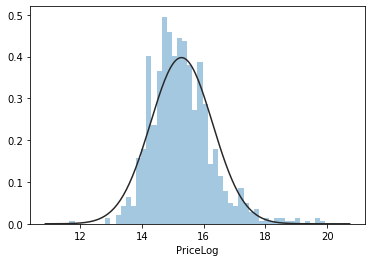

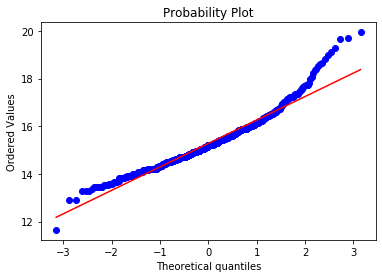

In [29]:
sns.distplot(df['PriceLog'], fit=norm,  bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df['PriceLog'], plot=plt)

# After Cube Root Transformation

In [30]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

In [31]:
df['PriceCubR'] = df['Price']**(1/3)

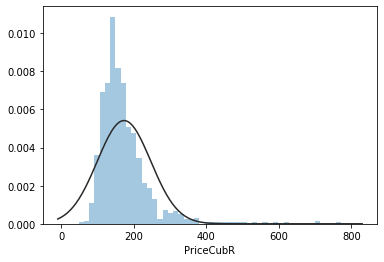

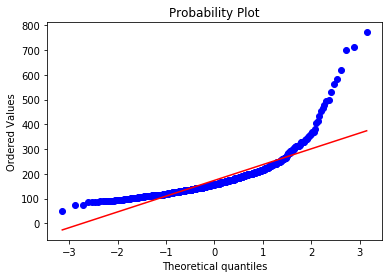

In [32]:
sns.distplot(df['PriceCubR'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df['PriceCubR'], plot=plt)

# After MaxLog Transformation

In [33]:
log_max = np.log(df['Price'].max())
df['PriceMaxLog'] = df['Price']**(1/log_max)

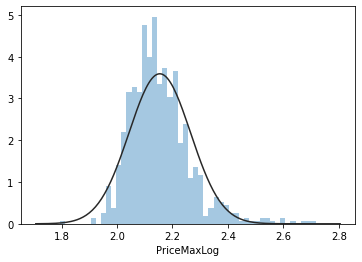

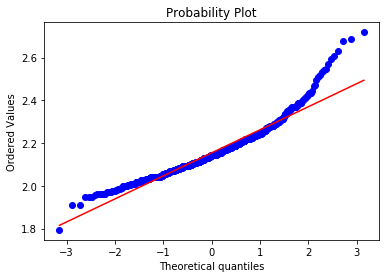

In [34]:
sns.distplot(df['PriceMaxLog'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df['PriceMaxLog'], plot=plt)

# Area_Sqm without any Transformation

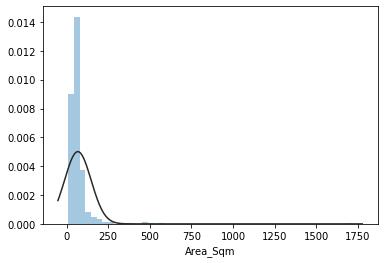

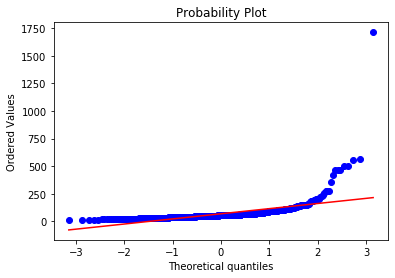

In [35]:
#transformed histogram and normal probability plot
sns.distplot(df['Area_Sqm'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df['Area_Sqm'], plot=plt)

# After Log Transformation

In [36]:
df['Area_SqmLog'] = np.log(df['Area_Sqm'])

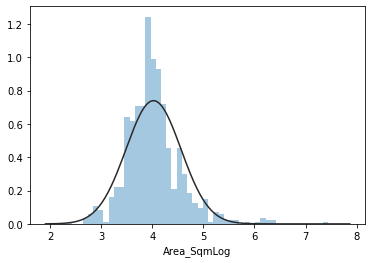

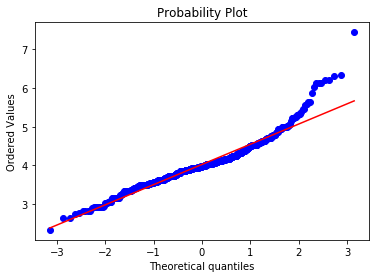

In [37]:
sns.distplot(df['Area_SqmLog'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df['Area_SqmLog'], plot=plt)

# After Cube Root Transformation

In [38]:
df['Area_SqmCubR'] = df['Area_Sqm']**(1/3)

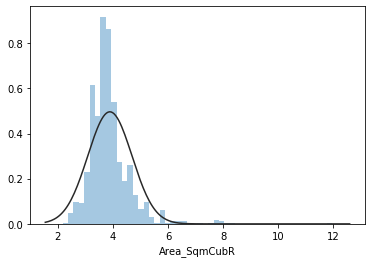

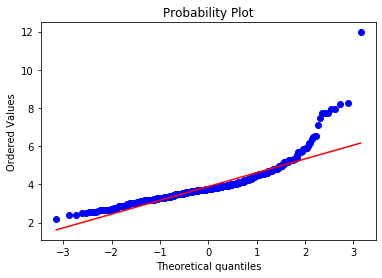

In [39]:
sns.distplot(df['Area_SqmCubR'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df['Area_SqmCubR'], plot=plt)

# After MaxLog Transformation

In [40]:
log_max = np.log(df['Area_Sqm'].max())
df['Area_SqmMaxLog'] = df['Area_Sqm']**(1/log_max)

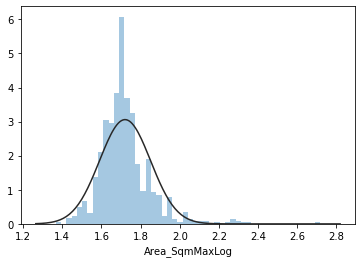

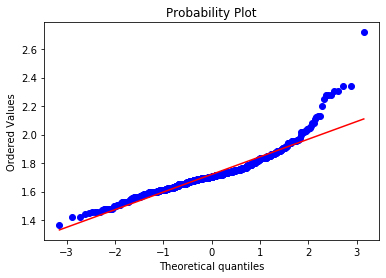

In [41]:
sns.distplot(df['Area_SqmMaxLog'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df['Area_SqmMaxLog'], plot=plt)

# PricePerSqM without any Transformation

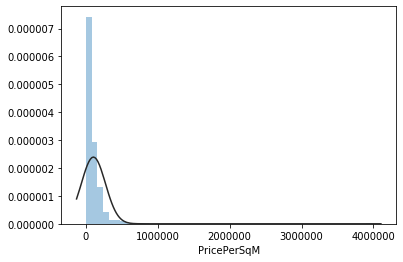

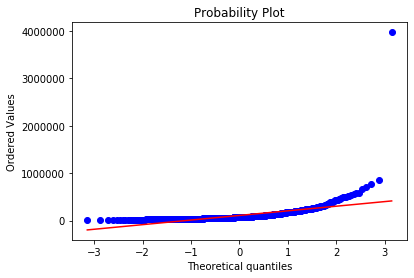

In [42]:
#histogram and normal probability plot
sns.distplot(df['PricePerSqM'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df['PricePerSqM'], plot=plt)

# After Log Transformation

In [43]:
df['PricePerSqMLog'] = np.log(df['PricePerSqM'])

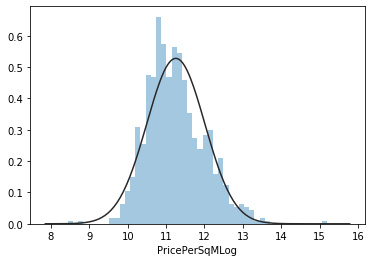

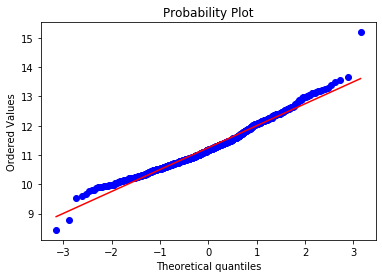

In [44]:
sns.distplot(df['PricePerSqMLog'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df['PricePerSqMLog'], plot=plt)

# After Cube Root Transformation

In [45]:
df['PricePerSqMCubR'] = normalize(df['PricePerSqM']**(1/3))

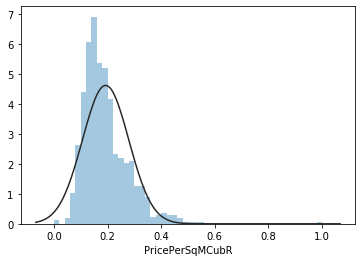

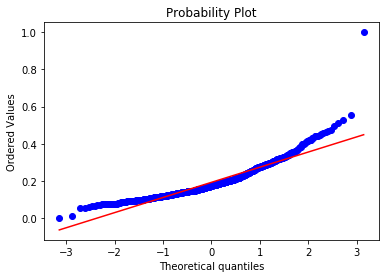

In [46]:
sns.distplot(df['PricePerSqMCubR'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df['PricePerSqMCubR'], plot=plt)

# After LogMax Transformation

In [47]:
log_max = np.log(df['PricePerSqM'].max())
df['PricePerSqMmaxLog'] = normalize(df['PricePerSqM']**(1/log_max))

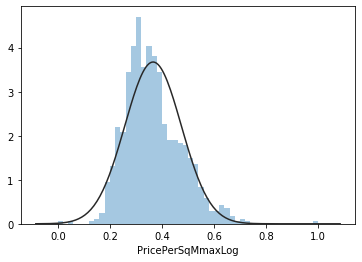

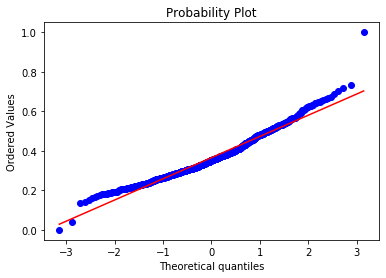

In [48]:
sns.distplot(df['PricePerSqMmaxLog'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df['PricePerSqMmaxLog'], plot=plt)

In [49]:
df.head()

,Price,Area_Sqm,Bedrooms,Latitude,Longitude,PricePerSqM,PriceLog,PriceCubR,PriceMaxLog,Area_SqmLog,Area_SqmCubR,Area_SqmMaxLog,PricePerSqMLog,PricePerSqMCubR,PricePerSqMmaxLog
0,13300000,74.32,2,19.210200,72.864891,178885.00,16.403275,236.928450,2.275830,4.308380,4.204379,1.783484,12.094498,0.279942,0.485584
1,9000000,55.74,1,19.167700,72.949300,168566.16,16.012735,208.008382,2.231705,4.020698,3.819932,1.715897,12.035084,0.272145,0.476715
2,9000000,43.66,1,19.130609,72.873816,206032.48,16.012735,208.008382,2.231705,3.776432,3.521231,1.660525,12.235789,0.299117,0.506814
3,9000000,78.97,2,19.126005,72.825052,113926.88,16.012735,208.008382,2.231705,4.369068,4.290297,1.798078,11.643312,0.224421,0.419096
4,100000000,464.51,5,19.075014,72.907571,215200.00,18.420681,464.158883,2.518046,6.140983,7.744589,2.281121,12.279323,0.305209,0.513395


In [54]:
dfLog = df[['PriceLog', 'Area_SqmLog', 'Bedrooms', 'Latitude', 'Longitude', 'PricePerSqMLog']]

In [56]:
dfCubR = df[['PriceCubR', 'Area_SqmCubR', 'Bedrooms', 'Latitude', 'Longitude', 'PricePerSqMCubR']]

In [57]:
dfMaxLog = df[['PriceMaxLog', 'Area_SqmMaxLog', 'Bedrooms', 'Latitude', 'Longitude', 'PricePerSqMmaxLog']]

In [58]:
corr=dfLog.corr()

In [59]:
corr["PriceLog"].sort_values(ascending=False)

PriceLog          1.000000
PricePerSqMLog    0.806584
Area_SqmLog       0.625713
Bedrooms          0.491268
Longitude        -0.010006
Latitude         -0.012602
Name: PriceLog, dtype: float64

In [60]:
corr=dfCubR.corr()

In [61]:
corr["PriceCubR"].sort_values(ascending=False)

PriceCubR          1.000000
PricePerSqMCubR    0.756747
Area_SqmCubR       0.647559
Bedrooms           0.575250
Longitude         -0.008387
Latitude          -0.012244
Name: PriceCubR, dtype: float64

In [62]:
corr=dfMaxLog.corr()

In [63]:
corr["PriceMaxLog"].sort_values(ascending=False)

PriceMaxLog          1.000000
PricePerSqMmaxLog    0.804480
Area_SqmMaxLog       0.633836
Bedrooms             0.505829
Longitude           -0.009806
Latitude            -0.012449
Name: PriceMaxLog, dtype: float64

In [64]:
#saleprice correlation matrix
'''
k = 6 #number of variables for heatmap
cols = corr.nlargest(k, 'Price')['Price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
'''

"\nk = 6 #number of variables for heatmap\ncols = corr.nlargest(k, 'Price')['Price'].index\ncm = np.corrcoef(df[cols].values.T)\nsns.set(font_scale=1.25)\nhm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)\nplt.show()\n"

In [65]:
import warnings
warnings.filterwarnings("ignore")

# Fitting Model

In [66]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(dfLog, test_size=0.1, random_state=42)

In [67]:
X = train_set[['Area_SqmLog','Bedrooms','PricePerSqMLog','Latitude','Longitude']]
Y = train_set['PriceLog']

In [68]:
x = test_set[['Area_SqmLog','Bedrooms','PricePerSqMLog','Latitude','Longitude']]
y = test_set['PriceLog']

In [69]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(dfCubR, test_size=0.1, random_state=42)

In [70]:
A = train_set[['Area_SqmCubR','Bedrooms','PricePerSqMCubR','Latitude','Longitude']]
B = train_set['PriceCubR']

In [71]:
a = test_set[['Area_SqmCubR','Bedrooms','PricePerSqMCubR','Latitude','Longitude']]
b = test_set['PriceCubR']

In [72]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(dfMaxLog, test_size=0.1, random_state=42)

In [77]:
C = train_set[['Area_SqmMaxLog','Bedrooms','PricePerSqMmaxLog','Latitude','Longitude']]
D = train_set['PriceMaxLog']

In [78]:
c = test_set[['Area_SqmMaxLog','Bedrooms','PricePerSqMmaxLog','Latitude','Longitude']]
d= test_set['PriceMaxLog']

In [75]:
from sklearn import linear_model
regress = linear_model.LinearRegression()
#regress = linear_model.BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,normalize=False, tol=0.001, verbose=False)
regress.fit(X, Y) 
regress.fit(A, B)
regress.fit(C, D)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
print(regress.score(x, y))
print(regress.score(a, b))
print(regress.score(c, d))

-10.961811527192022
-2.7656618711987613
0.7860702442705751


In [ ]:
y_pred  = regress.predict(x)

In [31]:
print("Final rmse of LR is =",np.sqrt(np.mean((y-y_pred)**2)))

Final rmse of LR is = 0.5025658262899986


array([7972854.15256741])

In [32]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=350, random_state=0, max_depth=25, min_samples_leaf = 2)

regressor.fit(X, Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=350,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [33]:
y_predict = regressor.predict(x)

In [34]:
regressor.score(x, y)

0.7773530737106703

In [35]:
print("Final rmse of RFR is =",np.sqrt(np.mean((y-y_predict)**2)))

Final rmse of RFR is = 0.5482131595926312


In [47]:
PriceValue = regress.predict([[4.7138, 1, 11.18, 18.982, 72.9790]])

In [48]:
np.exp(PriceValue)

array([7972854.15256741])

In [36]:
import xgboost as xgb

In [37]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, 
                             learning_rate=0.05, max_depth=6, 
                             min_child_weight=1.5, n_estimators=7200,
                             reg_alpha=0.9, reg_lambda=0.6,
                             subsample=0.2,seed=42, silent=1,
                             random_state =7)

In [38]:
model_xgb.fit(X, Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.2, gamma=0.0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1.5, missing=None, n_estimators=7200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=7,
             reg_alpha=0.9, reg_lambda=0.6, scale_pos_weight=1, seed=42,
             silent=1, subsample=0.2, verbosity=1)

In [39]:
y_predic = model_xgb.predict(x)

In [40]:
model_xgb.score(x, y)

0.7846626963799095

In [41]:
print("Final rmse of XGBR is =",np.sqrt(np.mean((y-y_predic)**2)))

Final rmse of XGBR is = 0.5391389887696922


# Hyperparameter

In [44]:
params = {
    "n_estimators" : [250,200,300,350,150,100,400],
    "max_depth" : [5, 10, 15, 20, 25],
    "min_samples_leaf" : [1,2,3,4],
    "min_samples_split" : [1.0, 3, 2]
}

In [45]:
from sklearn.ensemble import RandomForestRegressor
RFReg = RandomForestRegressor(random_state=0)

In [46]:
from sklearn.model_selection import RandomizedSearchCV
CV_rfc = RandomizedSearchCV(estimator=RFReg, param_distributions =params, n_jobs = -1, cv= 10)

In [48]:
CV_rfc.fit(X,Y)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_state=

In [49]:
CV_rfc.best_params_

{'n_estimators': 350,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 25}

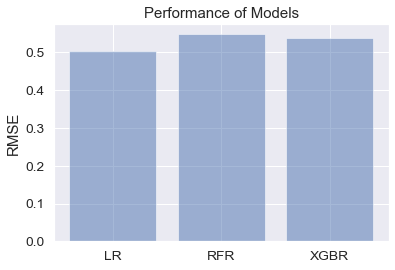

In [42]:
from matplotlib.ticker import FuncFormatter
objects = ('LR', 'RFR', 'XGBR')
y_pos = np.arange(len(objects))
performance = [0.5025658262899986, 0.5482131595926312, 0.5391389887696922]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('RMSE')
plt.title('Performance of Models')

plt.show()

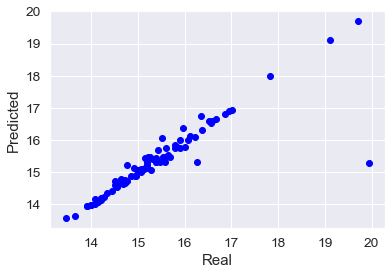

In [43]:
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.scatter(y, y_predic, c='blue');

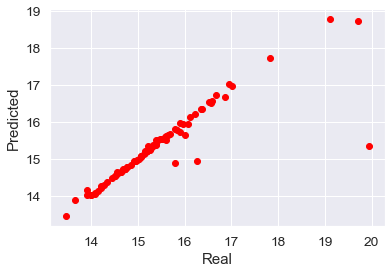

In [45]:
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.scatter(y, y_predict, c='red');

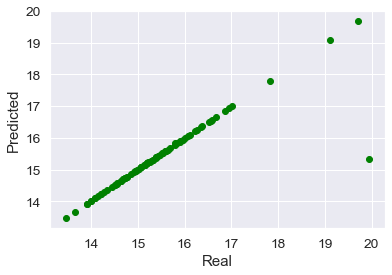

In [46]:
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.scatter(y, y_pred, c='green');